In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

defaultFontSize = 17

plt.rc('font', size=defaultFontSize) #controls default text size
plt.rc('axes', titlesize=defaultFontSize) #fontsize of the title
plt.rc('axes', labelsize=defaultFontSize+2) #fontsize of the x and y labels
plt.rc('xtick', labelsize=defaultFontSize) #fontsize of the x tick labels
plt.rc('ytick', labelsize=defaultFontSize) #fontsize of the y tick labels
plt.rc('legend', fontsize=defaultFontSize) #fontsize of the legend

cmapbins = '#250a43' #color for histogram bins

charginos = pd.read_csv('data/charginos.csv')

hitsDf = pd.read_pickle('data/hitsDf.pkl')

trackedCharginos = charginos.copy()

trackedCharginos = trackedCharginos[['mass', 'ctau', 'ctau*boost', 'validHits', 'event', 'run', 'luminosityBlock', 'pt', 'eta', 'phi', 'trackPt', 'trackEta', 'trackPhi', 'beta', 'gamma']]

trackedCharginos['hits'] = hitsDf

trackedCharginos = trackedCharginos[trackedCharginos['validHits'] != 0]

#trackedCharginos.sort_values('ctau', inplace=True)

trackedCharginos.head()

,mass,ctau,ctau*boost,validHits,event,run,luminosityBlock,pt,eta,phi,trackPt,trackEta,trackPhi,beta,gamma,hits
1,700.048,19.8977,103.71,4,10,1,1,134.275,-0.022846,-0.234468,52.1775,-0.022381,-0.235915,0.188422,1.01824,hit subdetector trackerPart layerDisk...
2,700.048,313.3090,196.55,24,4,1,1,279.622,-2.061050,0.529638,316.7240,-2.060890,0.529605,0.847108,1.88175,hit subdetector trackerPart layerDisk...
3,700.048,366.3240,288.53,25,4,1,1,249.409,-1.943630,-2.786050,260.0980,-1.943950,-2.785990,0.785585,1.61615,hit subdetector trackerPart layerDis...
6,700.048,368.9790,315.08,3,5,1,1,116.069,2.642970,-2.465940,10.3527,2.637710,-2.461090,0.760465,1.53993,hit subdetector trackerPart layerDis...
7,700.048,189.7580,250.55,18,2,1,1,526.916,-0.111461,1.445640,541.6250,-0.111233,1.445530,0.603751,1.25443,hit subdetector trackerPart layerDis...


In [2]:
trackedCharginos.loc[6,'hits']

,hit,subdetector,trackerPart,layerDiskWheel
hit1,1,1,1,1
hit2,2,1,2,1
hit3,3,1,2,2
hit4,4,1,2,2
hit5,5,1,2,3
hit6,6,1,2,3
hit7,7,1,4,2
hit8,8,1,4,2
hit9,9,1,4,3
hit10,10,1,4,3


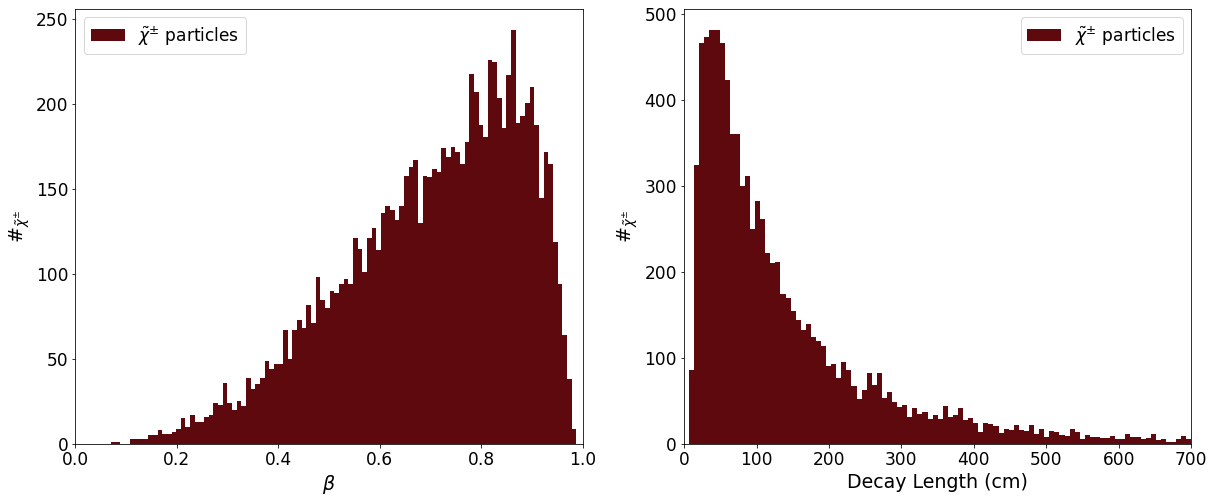

In [3]:
fig = plt.figure(figsize=(20,8))

ax = fig.add_subplot(121)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

ax.set_xlim(0,1)
_,_,im = ax.hist(trackedCharginos['beta'], bins=100, color='#5e090d', label=r'$\tilde{\chi}^{\pm}$ particles')
ax.legend()

ax = fig.add_subplot(122)
ax.set_xlabel('Decay Length (cm)')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

ax.set_xlim(0,700)
_,_,im = ax.hist(trackedCharginos['ctau'], bins=100, color='#5e090d', label=r'$\tilde{\chi}^{\pm}$ particles', range=[0,700])
ax.legend()

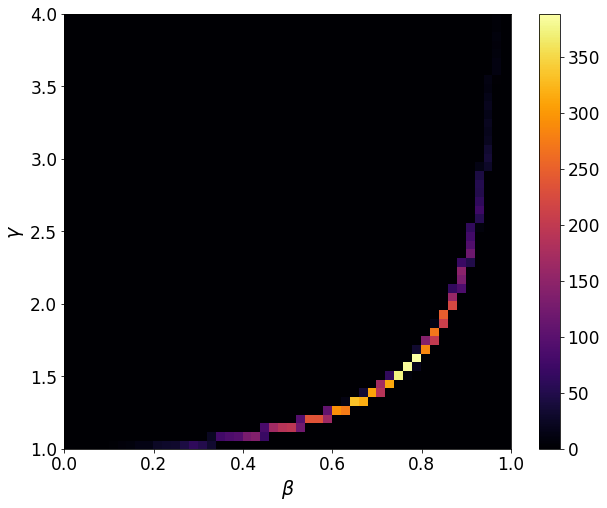

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$\gamma$')

_,_,_,im = ax.hist2d(trackedCharginos['beta'], trackedCharginos['gamma'], bins=50,range=[[0,1],[1,4]], cmap='inferno')
fig.colorbar(im)

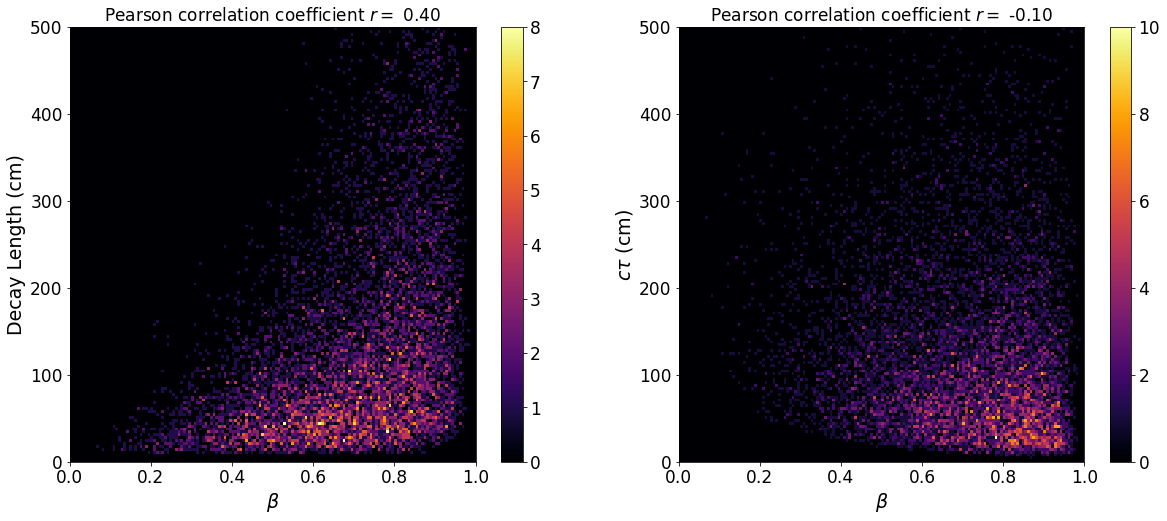

In [5]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'Decay Length (cm)')

ctauCorr = np.corrcoef(trackedCharginos['beta'], trackedCharginos['ctau'])
ax.title.set_text(r'Pearson correlation coefficient $r =$ %.4s' % (ctauCorr[0,1]))

_,_,_,im = ax.hist2d(trackedCharginos['beta'], trackedCharginos['ctau'], bins=150,range=[[0,1],[0,500]], cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$c\tau$ (cm)')

ctauBoostCorr = np.corrcoef(trackedCharginos['beta'], trackedCharginos['ctau*boost'])
ax.title.set_text(r'Pearson correlation coefficient $r =$ %.5s' % (ctauBoostCorr[0,1]))

_,_,_,im = ax.hist2d(trackedCharginos['beta'], trackedCharginos['ctau*boost'], bins=150,range=[[0,1],[0,500]], cmap='inferno')
fig.colorbar(im)

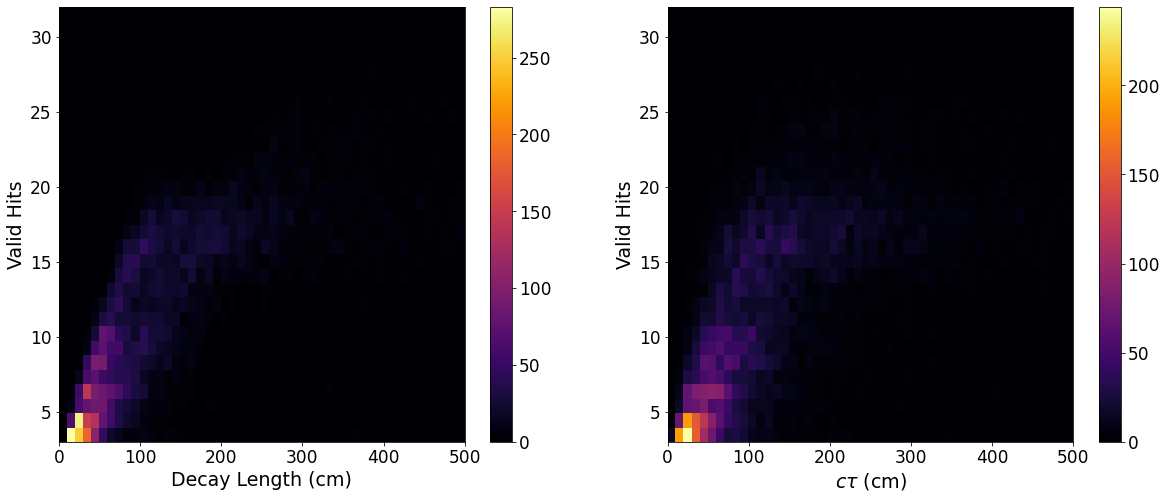

In [6]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'Decay Length (cm)')
ax.set_ylabel('Valid Hits')

_,_,_,im = ax.hist2d(trackedCharginos['ctau'], trackedCharginos['validHits'], bins=(50,30), range=[[0,500],[3,32]], cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$c\tau$ (cm)')
ax.set_ylabel('Valid Hits')

_,_,_,im = ax.hist2d(trackedCharginos['ctau*boost'], trackedCharginos['validHits'], bins=(50,30), range=[[0,500],[3,32]], cmap='inferno')
fig.colorbar(im)

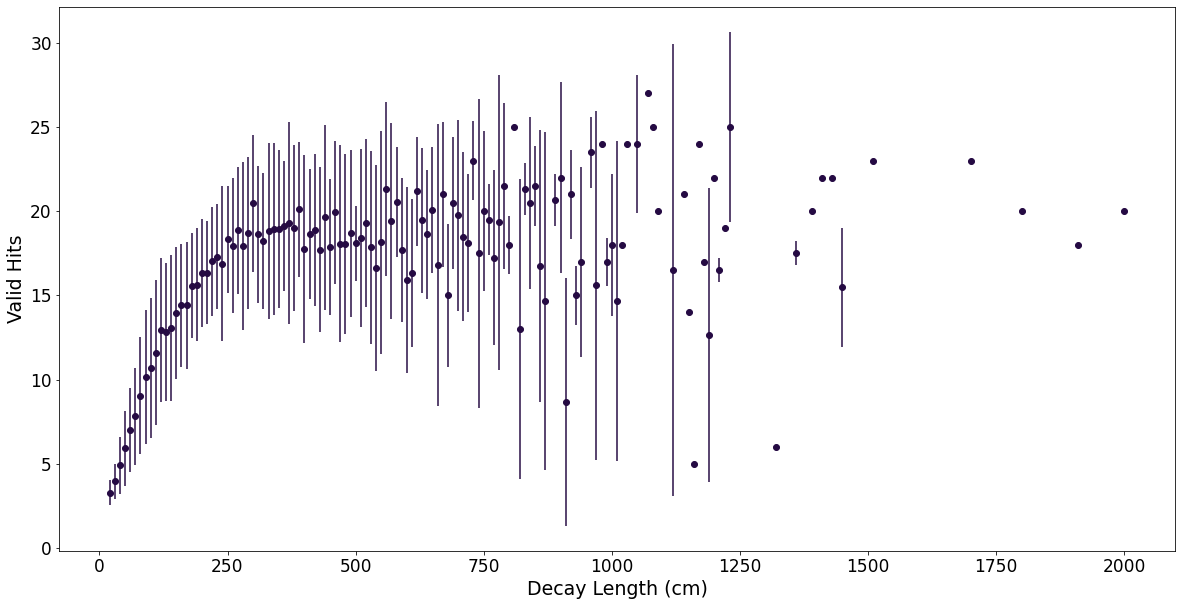

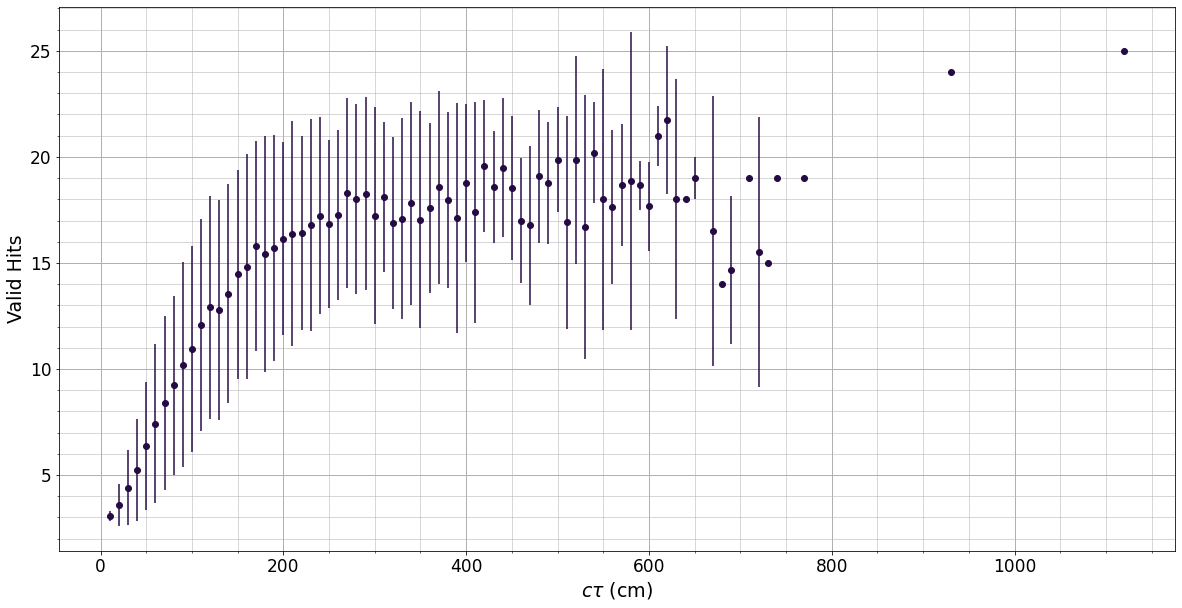

In [7]:
def createLabel10s(cTau):
    return (10 * np.ceil(cTau / 10))

trackedCharginos['cTauLabel10s'] = createLabel10s(trackedCharginos['ctau'])

cTau10cmMean = trackedCharginos.groupby('cTauLabel10s')['validHits'].mean()
cTau10cmStd = trackedCharginos.groupby('cTauLabel10s')['validHits'].std()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_xlabel('Decay Length (cm)')
ax.set_ylabel('Valid Hits')

ax.errorbar(cTau10cmMean.index, cTau10cmMean, yerr=cTau10cmStd, color=cmapbins, marker='o', elinewidth=1.5, linewidth=0)

trackedCharginos['cTauLabel10s'] = createLabel10s(trackedCharginos['ctau*boost'])

cTau10cmMean = trackedCharginos.groupby('cTauLabel10s')['validHits'].mean()
cTau10cmStd = trackedCharginos.groupby('cTauLabel10s')['validHits'].std()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$c\tau$ (cm)')
ax.set_ylabel('Valid Hits')

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,1200,25), minor=True)
ax.set_yticks(np.linspace(0,30,31), minor=True)
ax.set_xticks(np.linspace(0,1200,7))
ax.set_yticks(np.linspace(0,30,7))

ax.errorbar(cTau10cmMean.index, cTau10cmMean, yerr=cTau10cmStd, color=cmapbins, marker='o', elinewidth=1.5, linewidth=0)
plt.grid(which='both', axis='both')

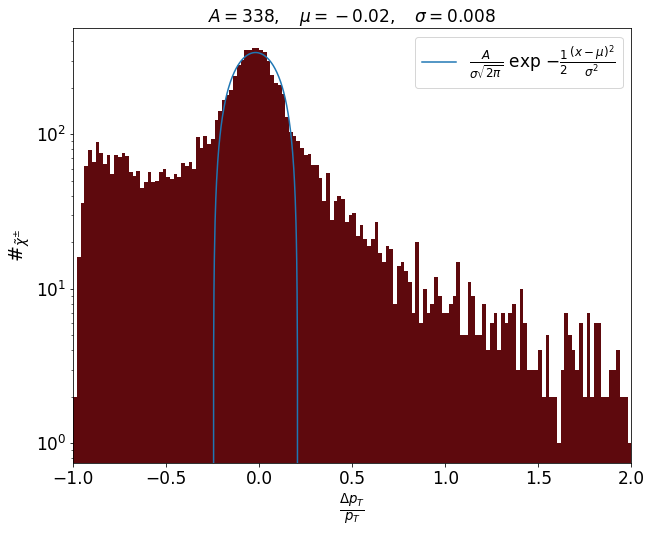

In [121]:
# Adding pt resolution to the dataframe
trackedCharginos['ptResolution'] = (trackedCharginos['trackPt'] - trackedCharginos['pt']) / trackedCharginos['pt']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')
ax.set_yscale('log')
ax.set_xlim(-1,2)

n,bins,im = ax.hist(trackedCharginos['ptResolution'],range=(-1,2) , bins=150, color='#5e090d')

binInterval = bins[1] - bins[0]
newBins = bins[:-1]
newBins = newBins + binInterval/2

def fitInterval(xmin, xmax, xarray, yarray):
    finalx = []
    finaly = []
    for i in range(len(xarray)):
        if (xarray[i] > xmin and xarray[i] < xmax):
            finalx.append(xarray[i])
            finaly.append(yarray[i])
    return finalx, finaly

xfit, yfit = fitInterval(-0.2, 0.2, newBins, n)
xfit = np.array(xfit)
yfit = np.array(yfit)
fitfunc = lambda p, x : p[0] * x * x + p[1] * x + p[2]
errfunc = lambda p, x, y : fitfunc(p, x) - y
init = [-1, 1, 300]
out = leastsq(errfunc, init, args=(xfit, yfit))
fittedCurve = out[0]

curveArray = np.linspace(-.5, .5, 500)
plt.plot(curveArray, fitfunc(fittedCurve, curveArray), label = r'$\frac{A}{\sigma \sqrt{2\pi}}$ exp $-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}$')
plt.legend()

peak = fitfunc(fittedCurve, (-fittedCurve[1])/(2 * fittedCurve[0]))

plt.title(r'$A = %.3s, \quad \mu = %.5s, \quad \sigma = %.5s$' % (peak, (-fittedCurve[1])/(2 * fittedCurve[0]), np.sqrt(-1 / (2 * fittedCurve[0]))))

positiveDeltaPt = trackedCharginos[trackedCharginos['ptResolution']>0]
negativeDeltaPt = trackedCharginos[trackedCharginos['ptResolution']<0]

#print(r'Positive resolution Charginos: %s  (%.4s %%) ; Negative resolution Charginos: %s (%.4s %%)' % (positiveDeltaPt.shape[0], 100* positiveDeltaPt.shape[0] / trackedCharginos.shape[0], negativeDeltaPt.shape[0], 100* negativeDeltaPt.shape[0] / trackedCharginos.shape[0]))

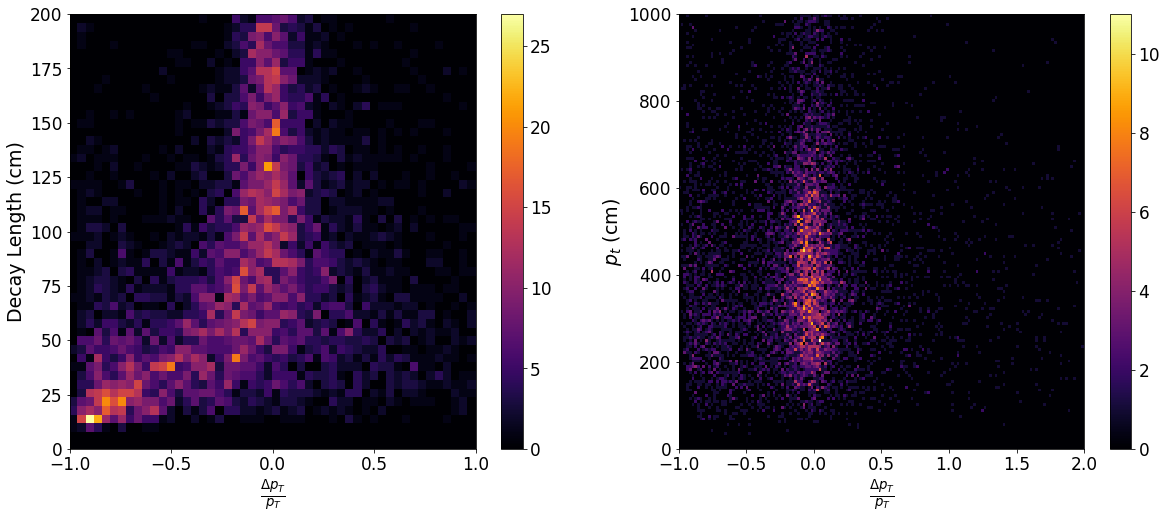

In [9]:
fig = plt.figure(figsize=(20,8))
xrange = 1

ax = fig.add_subplot(121)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel('Decay Length (cm)')

dfg100 = trackedCharginos[trackedCharginos['ctau'] < 200]

_,_,_,im = ax.hist2d(dfg100['ptResolution'],dfg100['ctau'],range=((-1,xrange),(0,200)) , bins=50, cmap='inferno')
fig.colorbar(im)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$p_{t}$ (cm)')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['pt'],range=((-1,2),(0,1000)) , bins=150, cmap='inferno')
fig.colorbar(im)

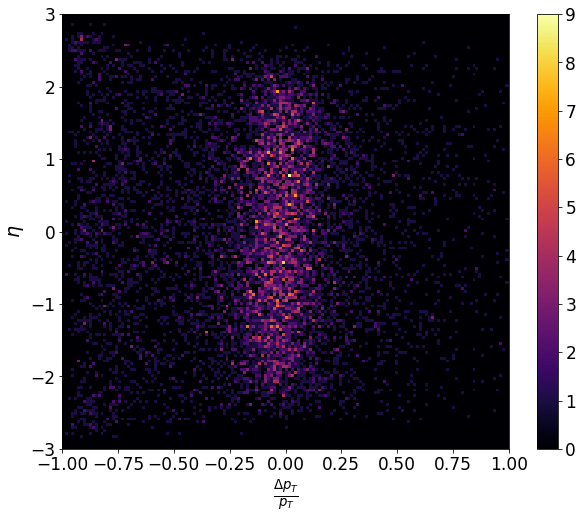

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$\eta$')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['eta'],range=((-1,1),(-3,3)) , bins=150, cmap='inferno')
fig.colorbar(im)

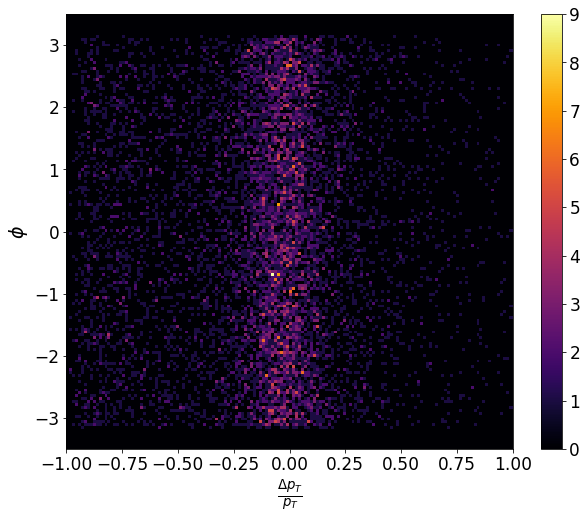

In [11]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\frac{\Delta p_{T}}{p_{T}}$')
ax.set_ylabel(r'$\phi$')

_,_,_,im = ax.hist2d(trackedCharginos['ptResolution'],trackedCharginos['phi'],range=((-1,1),(-3.5,3.5)) , bins=150, cmap='inferno')
fig.colorbar(im)

plt.savefig('plots/resolutionPhiHist2d.pdf')

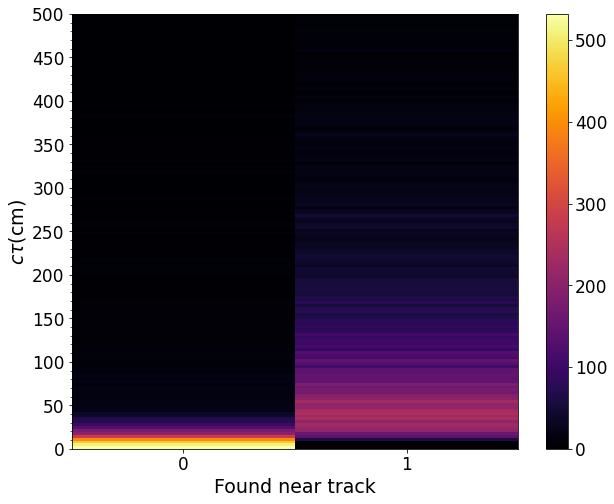

In [12]:
# Fazer plots de eficiência (dos charginos gerados quantos que achou track) em função com ctau, eta, phi

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

ax.set_xlabel('Found near track')
ax.set_ylabel(r'$c\tau$(cm)')

xlimit = 1.5

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-xlimit,xlimit)

ax.set_xticks([0,1])
ax.set_yticks(np.linspace(0,500,11))
ax.set_yticks(np.linspace(0,500,51), minor=True)

_,_,_,im = ax.hist2d(charginos['foundNearTrack'],charginos['ctau'],range=((-.5,1.5),(0,500)) , bins=(2,150), cmap='inferno')
fig.colorbar(im)

In [13]:
def variableLabels(variable, interval):
    return (interval * np.ceil(variable / interval))

In [14]:
def variableEfficiency(particles, trackedParticles, variable, interval):
    tmpParticles = particles.copy()
    tmpTrackedParticles = trackedParticles.copy()
    
    tmpParticles['groupByLabel'] = variableLabels(tmpParticles[variable], interval)
    tmpTrackedParticles['groupByLabel'] = variableLabels(tmpTrackedParticles[variable], interval)
    
    particlesNumber = tmpParticles.groupby('groupByLabel')[variable].count()
    trackedParticlesNumber = tmpTrackedParticles.groupby('groupByLabel')[variable].count()
    
    recEfficiency = pd.DataFrame(particlesNumber)
    recEfficiency['trackedParticlesNumber'] = trackedParticlesNumber
    
    recEfficiency['trackedParticlesNumber'] = recEfficiency['trackedParticlesNumber'].replace(np.nan, 0)
    recEfficiency['efficiency'] = recEfficiency['trackedParticlesNumber'] / recEfficiency[variable]
    
    return recEfficiency

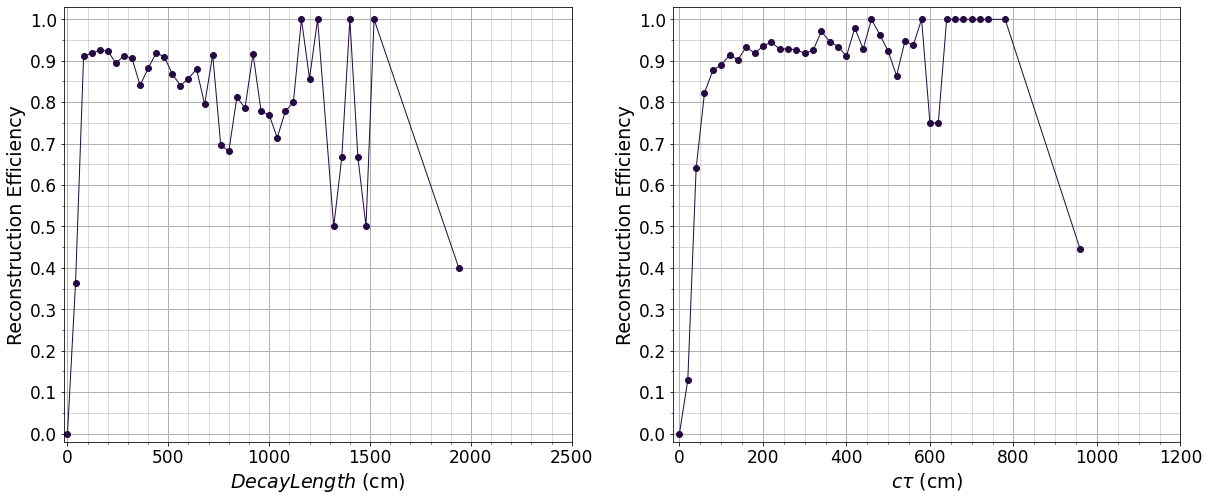

In [15]:
variableInterval = 40
variableIntervalBoost = 20

recEfficiency = variableEfficiency(charginos, trackedCharginos, 'ctau', variableInterval)
recEfficiency = recEfficiency[recEfficiency.index < 1530]
highTau = pd.DataFrame(data=[[5, 2, 0.4]], index=[1940.0], columns=['ctau*boost', 'trackedParticlesNumber', 'efficiency'])
recEfficiency = recEfficiency.append(highTau)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$Decay Length$ (cm)')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-15,2500)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,2500,26), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(0,2500,6))
ax.set_yticks(np.linspace(0,1,11))

ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=cmapbins, marker='o', linewidth=1)
plt.grid(which='both', axis='both')

recEfficiency = variableEfficiency(charginos, trackedCharginos, 'ctau*boost', variableIntervalBoost)

recEfficiency = recEfficiency[recEfficiency.index < 800]
highTau = pd.DataFrame(data=[[9, 4, 4/9]], index=[960.0], columns=['ctau*boost', 'trackedParticlesNumber', 'efficiency'])
recEfficiency = recEfficiency.append(highTau)

ax = fig.add_subplot(122)

ax.set_xlabel(r'$c\tau$ (cm)')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-15,1200)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,1200,25), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(0,1200,7))
ax.set_yticks(np.linspace(0,1,11))

ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=cmapbins, marker='o', linewidth=1)
plt.grid(which='both', axis='both')

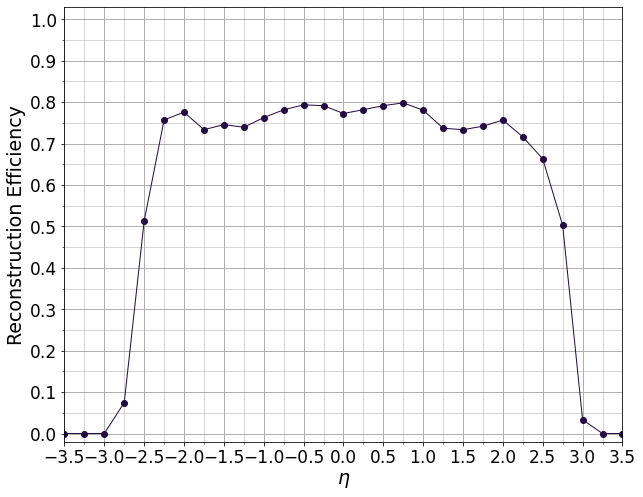

In [16]:
recEfficiency = variableEfficiency(charginos, trackedCharginos, 'eta', 0.25)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

xlimit = 3.5

ax.set_xlabel(r'$\eta$')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-xlimit,xlimit)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(-xlimit,xlimit,29), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(-xlimit,xlimit,15))
ax.set_yticks(np.linspace(0,1,11))

ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=cmapbins, marker='o', linewidth=1)
plt.grid(which='both', axis='both')

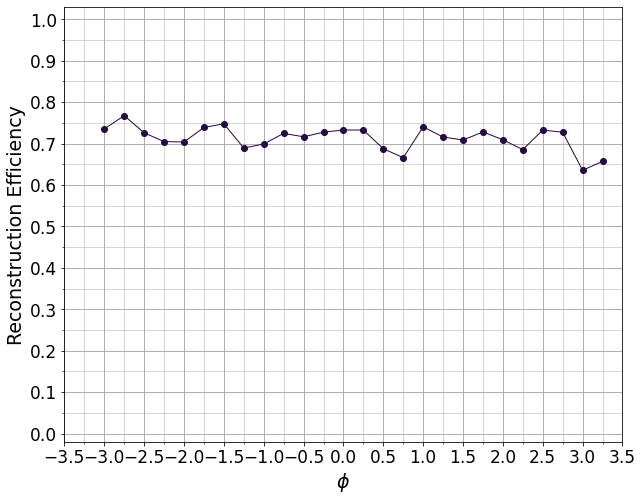

In [17]:
recEfficiency = variableEfficiency(charginos, trackedCharginos, 'phi', 0.25)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

xlimit = 3.5

ax.set_xlabel(r'$\phi$')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(-xlimit,xlimit)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(-xlimit,xlimit,29), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(-xlimit,xlimit,15))
ax.set_yticks(np.linspace(0,1,11))

ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=cmapbins, marker='o', linewidth=1)
plt.grid(which='both', axis='both')

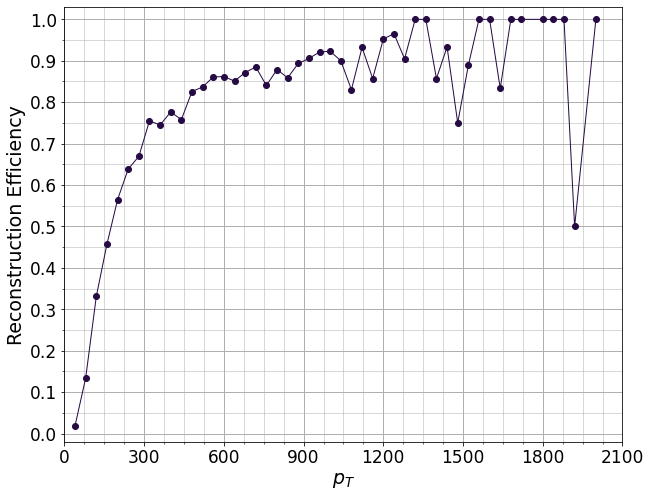

In [18]:
recEfficiency = variableEfficiency(charginos, trackedCharginos, 'pt', 40)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

xlimit = 2100

ax.set_xlabel(r'$p_{T}$')
ax.set_ylabel('Reconstruction Efficiency')

ax.set_ylim(-0.02, 1.03)
ax.set_xlim(0,xlimit)

ax.tick_params(which='major',grid_linewidth=1)
ax.tick_params(which='minor',grid_linewidth=0.5)
ax.set_xticks(np.linspace(0,xlimit,29), minor=True)
ax.set_yticks(np.linspace(0,1,21), minor=True)
ax.set_xticks(np.linspace(0,xlimit,8))
ax.set_yticks(np.linspace(0,1,11))

ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=cmapbins, marker='o', linewidth=1)
plt.grid(which='both', axis='both')

In [83]:
def PtCtauCut(ptThreshold, ctauThreshold):
    lowPtTrackedCharginos = trackedCharginos[trackedCharginos['pt'] < ptThreshold]
    lowPtTrackedCharginos = lowPtTrackedCharginos[lowPtTrackedCharginos['ctau*boost'] > ctauThreshold]
    lowPtCharginos = charginos[charginos['pt'] < ptThreshold]
    lowPtCharginos = lowPtCharginos[lowPtCharginos['ctau*boost'] > ctauThreshold]
    
    return lowPtTrackedCharginos, lowPtCharginos

def plotPtCtauCut(xlimit, ctauThreshold, plotRow, plotColumn, title, colorline, ylabel):
    lowPtTrackedCharginos, lowPtCharginos = PtCtauCut(xlimit, ctauThreshold)

    recEfficiency = variableEfficiency(lowPtCharginos, lowPtTrackedCharginos, 'pt', 10)

    ax.set_title(title)
    ax.set_xlabel(r'$p_{T}$')
    ax.set_ylabel('Reconstruction Efficiency') if ylabel else 0

    ax.set_ylim(-0.02, 1.03)
    ax.set_xlim(0,xlimit)

    ax.tick_params(which='major',grid_linewidth=1)
    ax.tick_params(which='minor',grid_linewidth=0.5)
    ax.set_xticks(np.linspace(0,xlimit,31), minor=True)
    ax.set_yticks(np.linspace(0,1,21), minor=True)
    ax.set_xticks(np.linspace(0,xlimit,7))
    ax.set_yticks(np.linspace(0,1,11))

    ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=colorline, marker='o', linewidth=1)
    plt.grid(which='both', axis='both')
    
    return 0

0

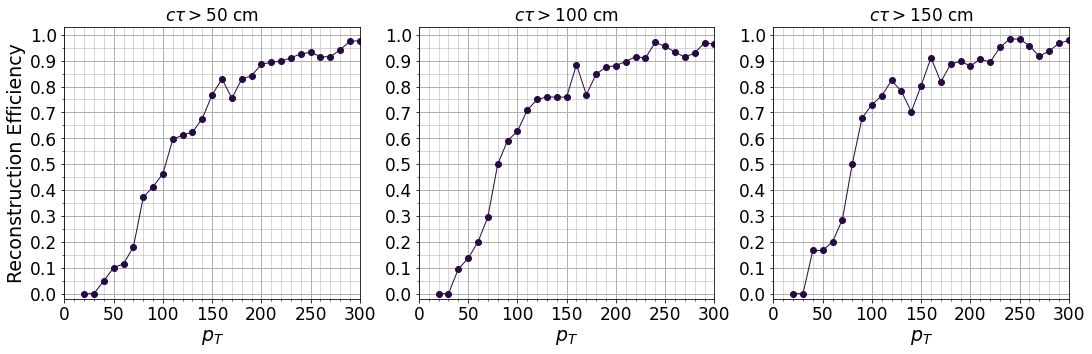

In [84]:
fig = plt.figure(figsize=(18,5))

ax = fig.add_subplot(131)
plotPtCtauCut(300, 50, 1, 1, r'$c\tau > 50$ cm', cmapbins, 1)

ax = fig.add_subplot(132)
plotPtCtauCut(300, 100, 1, 1, r'$c\tau > 100$ cm', cmapbins, 0)

ax = fig.add_subplot(133)
plotPtCtauCut(300, 150, 1, 1, r'$c\tau > 150$ cm', cmapbins, 0)

#ax = fig.add_subplot(224)
#plotPtCtauCut(300, 200, 1, 1)

In [94]:
def plotPtCtau(xlimit, ctauThreshold, plotRow, plotColumn, title, colorline, ylabel):
    lowPtTrackedCharginos, lowPtCharginos = PtCtauCut(xlimit, ctauThreshold)

    recEfficiency = variableEfficiency(lowPtCharginos, lowPtTrackedCharginos, 'pt', 10)

    ax.set_title(title)
    ax.set_xlabel(r'$p_{T}$')
    ax.set_ylabel('Reconstruction Efficiency') if ylabel else 0

    ax.set_ylim(-0.02, 1.03)
    ax.set_xlim(0,xlimit)

    ax.tick_params(which='major',grid_linewidth=1)
    ax.tick_params(which='minor',grid_linewidth=0.5)
    ax.set_xticks(np.linspace(0,xlimit,31), minor=True)
    ax.set_yticks(np.linspace(0,1,21), minor=True)
    ax.set_xticks(np.linspace(0,xlimit,7))
    ax.set_yticks(np.linspace(0,1,11))

    ax.plot(recEfficiency.index, recEfficiency['efficiency'], color=colorline, marker='o', linewidth=1, label = title)
    plt.grid(which='both', axis='both')
    plt.legend()
    
    return 0

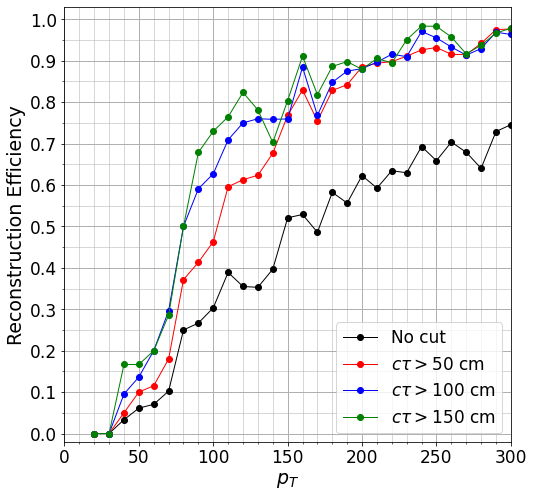

In [122]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
plotPtCtau(300, 0, 1, 1, 'No cut', 'black', 0)
plotPtCtau(300, 50, 1, 1, r'$c\tau > 50$ cm', 'red', 0)
plotPtCtau(300, 100, 1, 1, r'$c\tau > 100$ cm', 'blue', 0)
plotPtCtau(300, 150, 1, 1, r'$c\tau > 150$ cm', 'green', 1)
plt.title('')
plt.grid(which='both', axis='both')

In [19]:
testDf = trackedCharginos[['ctau', 'validHits', 'hits']]

testDf.head(15)

,ctau,validHits,hits
1,19.8977,4,hit subdetector trackerPart layerDisk...
2,313.3090,24,hit subdetector trackerPart layerDisk...
3,366.3240,25,hit subdetector trackerPart layerDis...
6,368.9790,3,hit subdetector trackerPart layerDis...
7,189.7580,18,hit subdetector trackerPart layerDis...
8,24.9152,3,hit subdetector trackerPart layerDis...
9,167.1490,14,hit subdetector trackerPart layerDisk...
10,126.3570,10,hit subdetector trackerPart layerDisk...
11,83.1632,17,hit subdetector trackerPart layerDis...
12,65.8442,8,hit subdetector trackerPart layerDis...


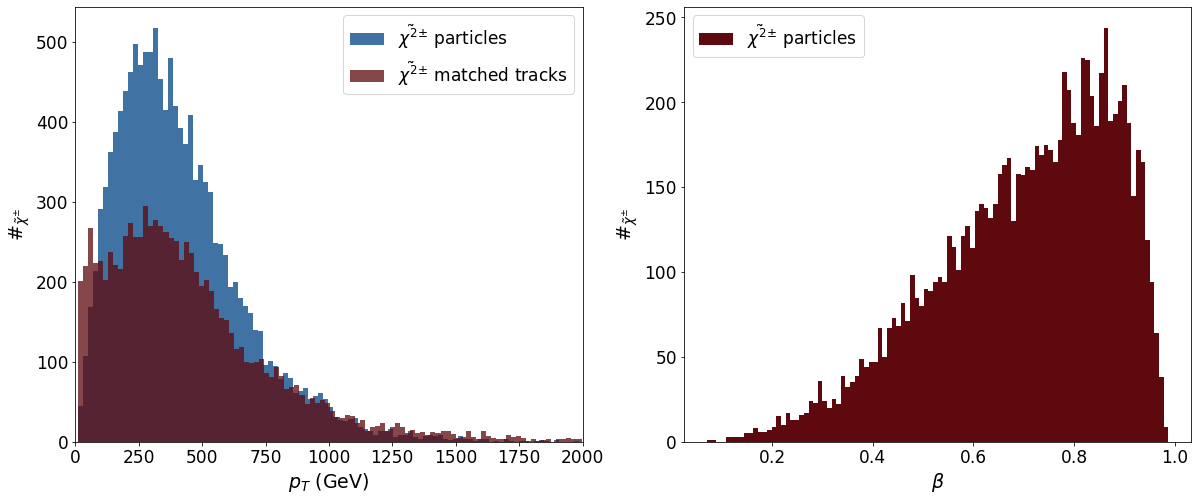

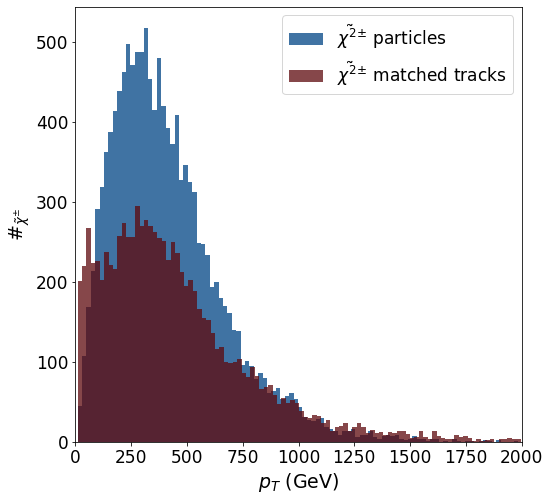

In [20]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)

ax.set_xlabel(r'$p_{T}$ (GeV)')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

selTrackedCharginos = trackedCharginos[trackedCharginos['trackPt'] < 2000]
_,_,im = ax.hist(charginos['pt'], bins=100, color='#004485', alpha=.75, label=r'$\tilde{\chi^2}^{\pm}$ particles')
_,_,im = ax.hist(selTrackedCharginos['trackPt'], bins=100, color='#5e090d', alpha=.75, label=r'$\tilde{\chi^2}^{\pm}$ matched tracks')
ax.legend()
ax.set_xlim((0,2000))

ax = fig.add_subplot(122)
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

_,_,im = ax.hist(trackedCharginos['beta'], bins=100, color='#5e090d', label=r'$\tilde{\chi^2}^{\pm}$ particles')
ax.legend()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.set_xlabel(r'$p_{T}$ (GeV)')
ax.set_ylabel(r'#$_{\tilde{\chi}^{\pm}}$')

selTrackedCharginos = trackedCharginos[trackedCharginos['trackPt'] < 2000]
_,_,im = ax.hist(charginos['pt'], bins=100, color='#004485', alpha=.75, label=r'$\tilde{\chi^2}^{\pm}$ particles')
_,_,im = ax.hist(selTrackedCharginos['trackPt'], bins=100, color='#5e090d', alpha=.75, label=r'$\tilde{\chi^2}^{\pm}$ matched tracks')
ax.legend()
ax.set_xlim((0,2000))

plt.savefig('plots/charginosMatchedCharginosHistogram.pdf')